In [2]:
import pandas as pd
df = pd.read_csv("mystery_data.csv")
df.head()

,101,40,M,5.6,45
0,102,90,M,10.3,97
1,103,84,F,7.7,98
2,104,52,M,11.6,98
3,105,43,F,8.4,47
4,106,40,M,8.8,60


In [3]:
df.columns = ['Id', 'Age', 'Gender', 'Height', 'Weight']
df.head()


,Id,Age,Gender,Height,Weight
0,102,90,M,10.3,97
1,103,84,F,7.7,98
2,104,52,M,11.6,98
3,105,43,F,8.4,47
4,106,40,M,8.8,60


In [4]:
df.columns = ['ID', 'Math', 'Gender', 'StudyHours', 'Science']
df.head()
# id: because its unique and increamental
# math: because it looks like marks
# gender: because m stands for male and f stands for f
# studyHours can be in float 
# science becuase it has marks range 0 -100

,ID,Math,Gender,StudyHours,Science
0,102,90,M,10.3,97
1,103,84,F,7.7,98
2,104,52,M,11.6,98
3,105,43,F,8.4,47
4,106,40,M,8.8,60


In [5]:
df=df.dropna(subset=['StudyHours']).copy()
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, 0 to 98
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          98 non-null     int64  
 1   Math        98 non-null     int64  
 2   Gender      98 non-null     object 
 3   StudyHours  98 non-null     float64
 4   Science     98 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 4.6+ KB


In [6]:
df["TotalScore"] = df['Math']+  df['Science']
df.sort_values(by="TotalScore", ascending=False).head()

,ID,Math,Gender,StudyHours,Science,TotalScore
16,118,93,M,9.1,97,190
0,102,90,M,10.3,97,187
1,103,84,F,7.7,98,182
98,200,89,M,10.1,90,179
76,178,87,F,4.8,92,179


In [7]:
import scipy.stats as stats
# Null Hypothesis (H₀): μ = 70 (Students who study >10 hrs/week score the same as the general average)
# Alternate Hypothesis (H₁): μ >70 (students who study > 10 hours/ week score more in maths)
population_mean = 70
sample= df[df['StudyHours'] <= 10]['Math']

t_stat, p_value = stats.ttest_1samp(sample, popmean=population_mean)
p_one_tailed = p_value / 2

if t_stat > 0 and p_one_tailed < 0.05 :
    print("Reject H₀: Students who study >10 hrs/week score more than general average")
else:
    print("Failed to reject H₀: ❌ No significant evidence they score more than 70")


Failed to reject H₀: ❌ No significant evidence they score more than 70


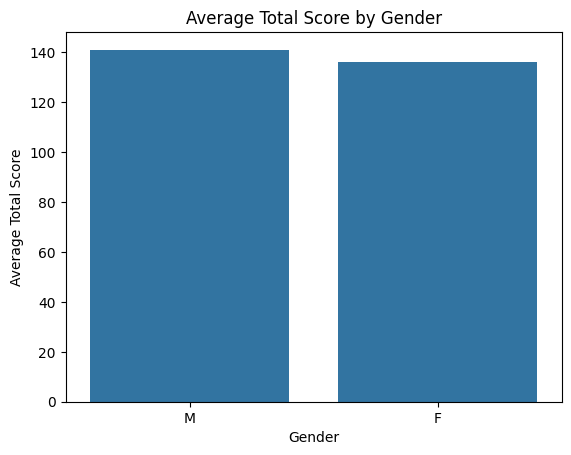

In [14]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Gender', y='TotalScore', data=df, errorbar=None)
plt.title('Average Total Score by Gender')
plt.ylabel("Average Total Score")
plt.show()

<Axes: xlabel='StudyHours', ylabel='Math'>

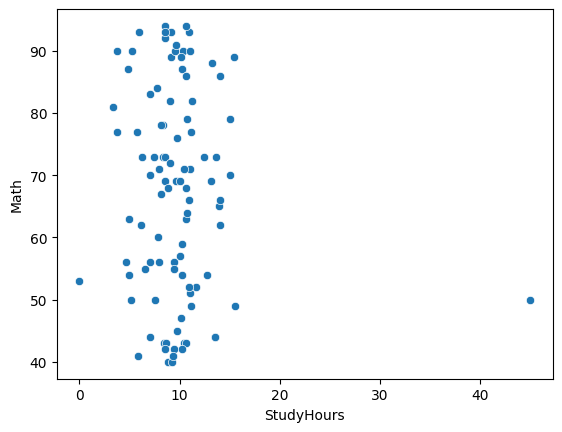

In [20]:
sns.scatterplot(x='StudyHours', y='Math', data=df)


In [22]:
help(sns.barplot)


Help on function barplot in module seaborn.categorical:

barplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    order=None,
    hue_order=None,
    estimator='mean',
    errorbar=('ci', 95),
    n_boot=1000,
    seed=None,
    units=None,
    weights=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    fill=True,
    hue_norm=None,
    width=0.8,
    dodge='auto',
    gap=0,
    log_scale=None,
    native_scale=False,
    formatter=None,
    legend='auto',
    capsize=0,
    err_kws=None,
    ci=<deprecated>,
    errcolor=<deprecated>,
    errwidth=<deprecated>,
    ax=None,
    **kwargs
)
    Show point estimates and errors as rectangular bars.

    A bar plot represents an aggregate or statistical estimate for a numeric
    variable with the height of each rectangle and indicates the uncertainty
    around that estimate using an error bar. Bar plots include 0 in the
    axis range, and they are a good choice when 0 is a meaningful value
